# Tensorflow

## O que é um tensor?
> Um tensor é uma array multidimencional com dados

E na framework ela pode ser representada e utilizada de formas diferentes

N-Dimensões|Entidade Matemática|Representação
---|---|---
0|Escalar|s = 335
1|Vetor| v \[3,5,6,1\]
2|Matriz| m = \[ \[1,2,3 \], \[4,5,6\], \[7,8,9\] \]
3|3-Tensor(Cubo)| t = \[ [ \[1,2,3 \], \[4,5,6\], \[7,8,9\] \], \[ \[1,2,3 \], \[4,5,6\], \[7,8,9\] \] \]
n|n-Tensor|....


Sendo assim o tensorflow é uma mistrura de Tersors e Flow (Um caminho, direção, fluxo) em uma execução em forma de Grafo. Utilizando 3 elementos
- Contantes: São valores Imutaveis
    ```python
        a = tf.constant(10)
    ```
- Placeholder: É como se fosse uma variavel mas sem a necessidade de ter um valor dentro, o qual poderá ser alocado mais tarde em tempo de execução o que facilita na construção do Grafo
    ```python
        a = tf.placeholder(tf.float32)
    ```
- Varaveis: Necessariamente uma variavel precisa receber um valor de inicialização
    ```python
        a = tf.Variables([20],tf.int32)
    ```


In [1]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

### Constantes

In [2]:
constante1 = tf.constant(10)
constante2 = tf.constant(3.14)
constante3 = tf.constant('Lemon Pie')
constante4 = tf.constant(True)

print([constante1,constante2,constante3,constante4])

[<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'Const_1:0' shape=() dtype=float32>, <tf.Tensor 'Const_2:0' shape=() dtype=string>, <tf.Tensor 'Const_3:0' shape=() dtype=bool>]


Para a execusão de algo no tensorflow é necessário fazer isso em uma Session

In [3]:
session = tf.Session()

In [4]:
print(session.run([constante1,constante2,constante3,constante4]))

[10, 3.14, b'Lemon Pie', True]


In [5]:
# Operações unidimencionais
adicao = tf.constant(20) + tf.constant(30)
multiplicacao = tf.constant(20) * tf.constant(30)
divisao = tf.constant(20) / tf.constant(30)

print('Operações unidimencionais',session.run([adicao,multiplicacao,divisao]))

# Operações multidimencionais
adicao = tf.constant([1,2,3]) + tf.constant([1,2,3])
multiplicacao = tf.constant([1,2,3]) * tf.constant([1,2,3])
divisao = tf.constant([1,2,3]) / tf.constant([1,2,3])

print('Operações multidimencionais',session.run([adicao,multiplicacao,divisao]))

string1 = tf.constant('Hello ')
string2 = tf.constant('World!')

print('Operações com string:',session.run(string1 + string2))

Operações unidimencionais [50, 600, 0.6666666666666666]
Operações multidimencionais [array([2, 4, 6], dtype=int32), array([1, 4, 9], dtype=int32), array([1., 1., 1.])]
Operações com string: b'Hello World!'


### Placeholders
Na hora da execução o feed_dict é um dicionário que recebera os valores que envolvem os placeholders para serem consultados em tempo de execução

In [6]:
a = tf.placeholder(tf.int32)
b = a * 2

print('Operações com placeholders:',session.run(b,feed_dict={a:5}))
print('Operações com placeholders:',session.run(b,feed_dict={a:[5,6,9,4]}))

str_nome = tf.placeholder(tf.string)
apresentation = "Eu me chamo " + str_nome
print('Operações com placeholders:',session.run(apresentation,feed_dict={str_nome:['Raphael','bob']}))

Operações com placeholders: 10
Operações com placeholders: [10 12 18  8]
Operações com placeholders: [b'Eu me chamo Raphael' b'Eu me chamo bob']


### Variaveis
As variaveis elas precisam ser criadas e depois acionadas/iniciadas para serem utilizada e elas funcionam como ponteiros, por tanto se vocês faz uma atribuição de forma simplificada ao atualizar ou alterar um valor as demais também serão atualizadas, por isso é importante usar o  ```var2 = tf.assign(var1,[21]) ``` para que seja atribuído apenas o valor naquela variavel, mesmo se for fazer uma mudança de valor na variavel.

In [7]:
var1 = tf.Variable([20],tf.int32)

init = tf.global_variables_initializer()
print('iniciando as variaveis',session.run(init))

print('var1',session.run(var1))
var2 = var1
print('var2',session.run(var2))

print()
var1 = tf.assign(var1,[21])
print('var1 atualizado',session.run(var1))
print('var2',session.run(var2))

print()
var2 = tf.assign(var2,[20])
print('var1',session.run(var1))
print('var2 atualizado',session.run(var2))

print()
var1 = tf.assign(var1,[22])
print('var1 atualizado',session.run(var1))
print('var2',session.run(var2))

iniciando as variaveis None
var1 [20]
var2 [20]

var1 atualizado [21]
var2 [21]

var1 [21]
var2 atualizado [20]

var1 atualizado [22]
var2 [20]


### Exemplo 1: Linear Model

In [8]:
W = tf.Variable([10],tf.int32)
b = tf.Variable([5],tf.int32)
x = tf.placeholder(tf.int32)

linear_model = W*x+b

init_lm = tf.global_variables_initializer()
session.run(init_lm)
print('Linear Model -  W*x+b:',session.run(linear_model,feed_dict={x:[1,3,4,6,9]}))

Linear Model -  W*x+b: [15 35 45 65 95]


### Exemplo 2: [MNIST](http://yann.lecun.com/exdb/mnist/) dataset
detalhes gerais sobre este dataset e os conceitos deste exemplo se encontram [aqui - video](https://www.youtube.com/watch?v=t_DdvgY71NE&ref=hackr.io) e [aqui - pdf](http://conteudo.icmc.usp.br/pessoas/moacir/papers/Ponti_Costa_Como-funciona-o-Deep-Learning_2017.pdf)

#### Conhecendo do Datase

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

In [20]:
mnist = input_data.read_data_sets('MINST_data/',one_hot=True)

Extracting MINST_data/train-images-idx3-ubyte.gz
Extracting MINST_data/train-labels-idx1-ubyte.gz
Extracting MINST_data/t10k-images-idx3-ubyte.gz
Extracting MINST_data/t10k-labels-idx1-ubyte.gz


In [11]:
print('Type data \t| Shape (qnt img x array pixel)')
print('Train: \t\t|',mnist.train.images.shape)
print('Test: \t\t|',mnist.test.images.shape)
print('Validation: \t|',mnist.validation.images.shape)

Type data 	| Shape (qnt img x array pixel)
Train: 		| (55000, 784)
Test: 		| (10000, 784)
Validation: 	| (5000, 784)


Lista 		 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Representação	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


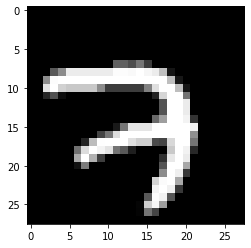

In [12]:
import numpy as np
import matplotlib.pyplot as plt

dim = int(np.sqrt(mnist.train.images.shape[1])) # tranform the vector in a matrix finding the dimention
plt.imshow(mnist.train.images[0].reshape(dim,dim),cmap="gray")
print('Lista \t\t',mnist.train.labels[0])
print('Representação\t',[0,1,2,3,4,5,6,7,8,9])

In [13]:
x = tf.placeholder(tf.float32,shape=[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

- **Função de Ativação**:  função de ativação de um nó define a saída desse nó, dada uma entrada ou conjunto de entradas.
$$ Softmax(x_i) = \frac{e^{x_i} } {\sum_i{e^{x_i}} }$$

In [14]:
# função de ativação aplicado na regressão linear y = W*x + b
y = tf.nn.softmax(tf.matmul(x,W)+b)

In [15]:
# valores de previsão
y_ = tf.placeholder(tf.float32,shape=[None,10])

- **Função de Custo**: função que computa a qualidade da predição responsável por dizer quão longe estamos da predição ideal e portanto quantifica o “custo” ou “perda” ao aceitarmos a predição gerada pelos parâmetros atuais do modelo
$$ H_{y'}(y) := - \sum_{i}{(y'_i log(y_i) + (1 - y'_i) log(1-y_i)) } $$

In [16]:
# Função de custo
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ - tf.log(y), reduction_indices=[1]))

In [17]:
# Treino do dataset usando o Gradiente Descente com uma taxa de aprendizado
# e minizando o erro com a função de custo Cross Entropy
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

In [18]:
# O Interective Session  torna-se a sessão padrão, por tanto é possível chamar as funções
# run() e eval() sem especificara sessão
session = tf.InteractiveSession() 
tf.global_variables_initializer().run()

In [22]:
for i in range(10):
    batch_x,batch_y = mnist.train.next_batch(100)
    session.run(train_step,feed_dict={x: batch_x, y_: batch_y})

predicao_correta = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
acuracia = tf.reduce_mean(tf.cast(predicao_correta,tf.float32))

print('Acurácia',session.run(acuracia,feed_dict={x:mnist.test.images, y_:mnist.test.labels}),'%')


Acurácia 0.098 %
